In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")

In [ ]:
df

array([3165, 3163, 3132, 3126, 3110, 3101, 3085, 3050, 2851, 2843, 2833,
       2655, 2642, 2234, 2089, 1557, 1539,  986,  861,  579,  439,  389,
        295,  276])

In [ ]:
plt.bar(df[df['booking_complete'] == 1]['flight_hour'].value_counts().index, df[['booking_complete'] == 1]['flight_hour'].value_counts().values)

KeyError: ignored

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


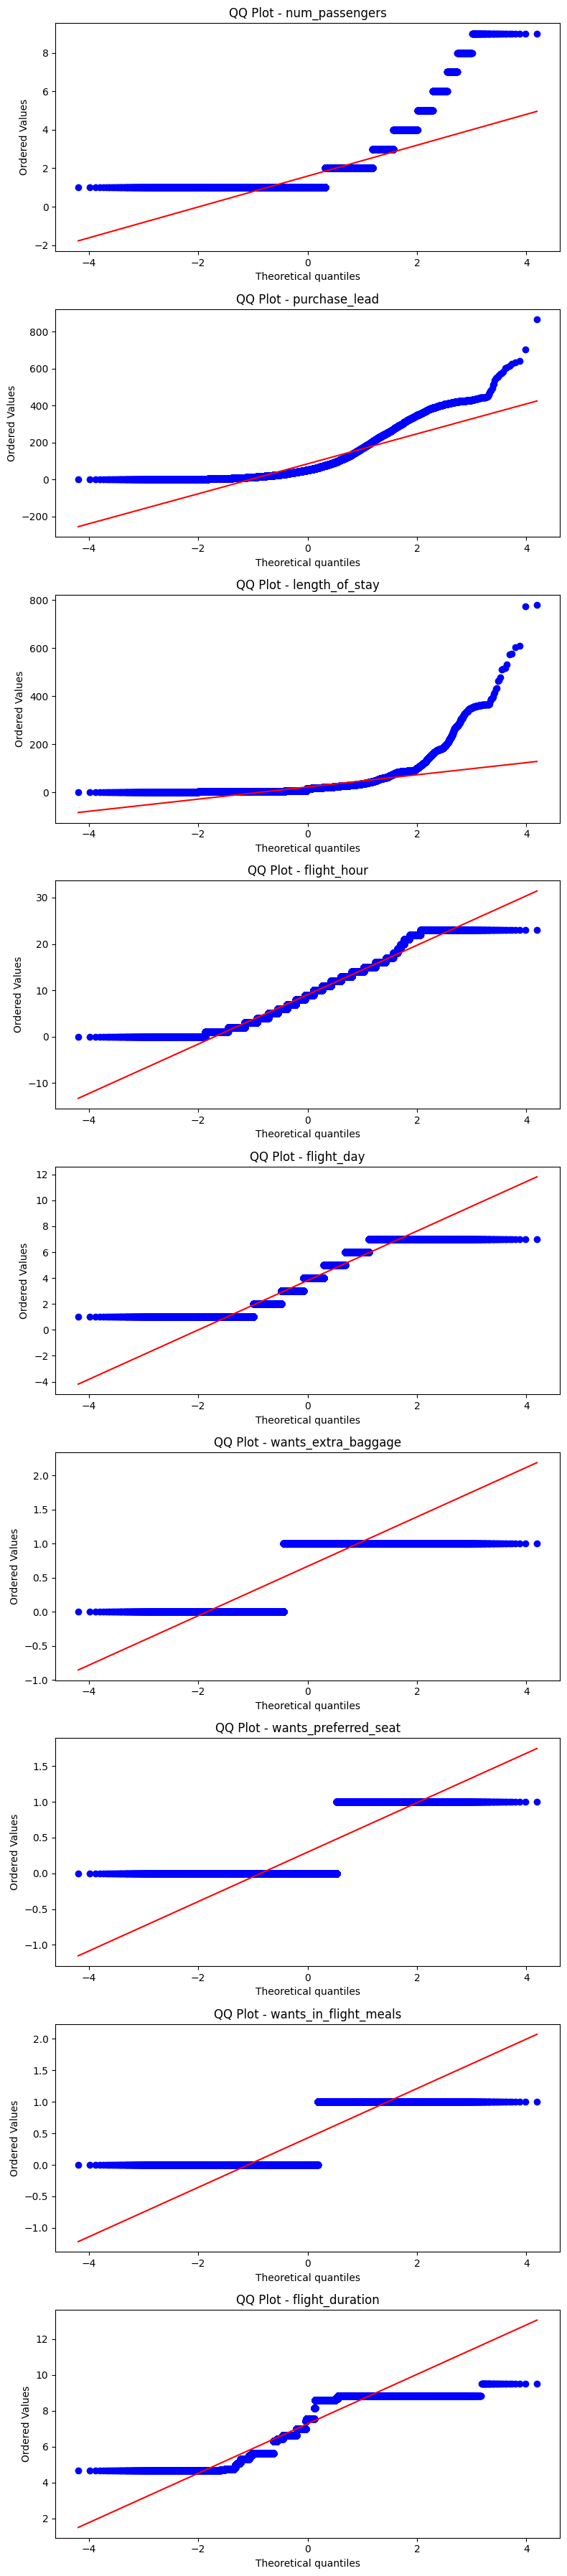

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = df  # Replace 'your_data.csv' with the actual filename or path

# Select the features for QQ plots
features = ['num_passengers',  'purchase_lead',
            'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
            'wants_in_flight_meals', 'flight_duration']

# Create subplots for the QQ plots
num_plots = len(features)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

# Generate QQ plots for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    stats.probplot(data[feature], dist='norm', plot=ax)
    ax.set_title(f'QQ Plot - {feature}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
iqr = df['purchase_lead'].quantile(0.75)-  df['purchase_lead'].quantile(0.25)
end_point = 1.5*iqr + df['purchase_lead'].quantile(0.75)
end_point
len(df[df['purchase_lead'] > end_point ]['purchase_lead'])

3456

<Axes: >

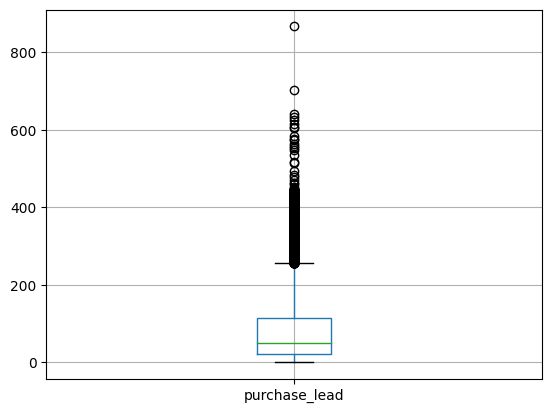

In [ ]:
df.boxplot('purchase_lead')

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


<ipython-input-21-d56b9e5b7e7f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm')


<Axes: >

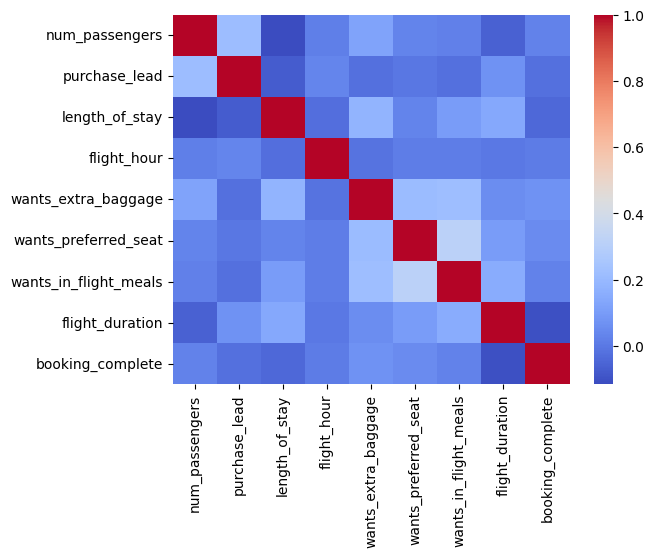

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.4 MB/s eta 0:00:00


In [ ]:
X = df[['sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']]
y = df['booking_complete']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# One-Hot Encoding for 'sales_channel'
sales_channel_encoded = pd.get_dummies(X['sales_channel'], prefix='sales_channel')

# Label Encoding for 'trip_type'
trip_type_encoded = LabelEncoder().fit_transform(X['trip_type'])

# Replace the original columns with the encoded columns
X = X.drop(['sales_channel', 'trip_type'], axis=1)
X = pd.concat([X, sales_channel_encoded, pd.Series(trip_type_encoded, name='trip_type_encoded')], axis=1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8444


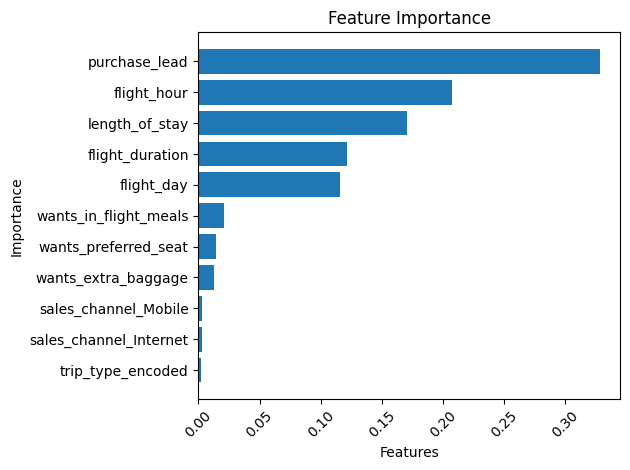

In [ ]:
importances = rf_classifier.feature_importances_

import numpy as np# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importance rankings
feat = []
importance = []
for i, feature in enumerate(X_train.columns[indices]):
    feat.append(feature)
    importance.append(importances[indices[i]])
    # print(f"{i+1}. {feature}: {}")
#


fig, ax = plt.subplots()

# Plot the bar chart
ax.barh(feat, importance)

# Set the labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_classifier, X_train, y_train, cv=10)
np.mean(scores)

0.8455999999999999

In [ ]:
from sklearn.metrics import precision_score, recall_score
# Calculate precision score
precision = precision_score(y_test, y_pred)

# Calculate recall score
recall = recall_score(y_test, y_pred)

# Print the scores
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.3707482993197279
Recall: 0.07364864864864865
